In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from functions_IB import kl_divergence, entropy, mutual_information

In [20]:
from functions_geom_DIB import generate_gaussian_points, add_index_to_data, px_i, calculate_probabilities
from functions_geom_DIB import geom_DIB, plot_clusters, DIB_curve

<h2> Test the algorithm on four points </h2>

In [4]:
data = [[0,0], [1,1], [5,5], [6.5,6.5]]
data_indexed = add_index_to_data(data)
data_px_given_i, data_joint_pix = calculate_probabilities(data_indexed)
# Run the iterative algorithm
q_t_given_x, q_t, q_y_given_t = geom_DIB(data_joint_pix, max_iter=10, beta = 0.5)

# Print the resulting distributions
print("\nq(t|x):")
print(q_t_given_x)
print("\nq(t):")
print(q_t)
print("\nq(y|t):")
print(q_y_given_t)


q(t|x):
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

q(t):
[0.47457627 0.02259887 0.47457627 0.02824859]

q(y|t):
[[4.99999989e-01 4.99999970e-01 4.11399755e-08 2.66389276e-14]
 [2.68941399e-01 7.31058518e-01 8.22697981e-08 5.32775278e-14]
 [6.28186749e-12 5.09025308e-08 4.99999954e-01 4.99999995e-01]
 [4.05078305e-19 6.59284350e-14 9.53494649e-02 9.04650535e-01]]


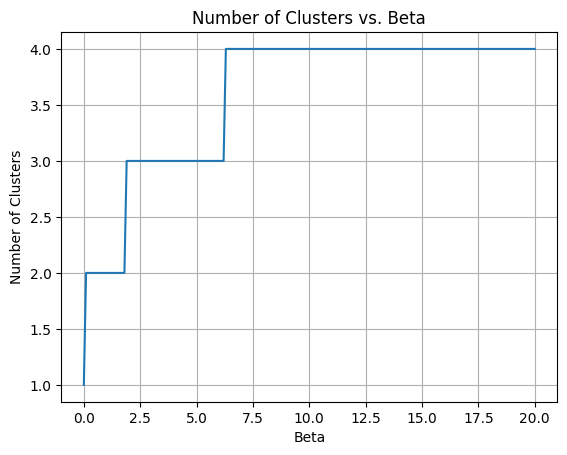

In [5]:
# Define a range of beta values
betas = np.linspace(0, 20, 201)

# Initialize an empty list to store the number of clusters
num_clusters_list = []

# Iterate over each beta value
for beta in betas:
    # Run iterative_algorithm to obtain q_t_given_x
    q_t_given_x, _, _ = geom_DIB(data_joint_pix, max_iter=100, beta=beta)
    
    # Calculate the number of clusters
    column_sum = np.sum(q_t_given_x, axis=0)
    num_clusters = np.count_nonzero(column_sum)
    
    # Append the number of clusters to the list
    num_clusters_list.append(num_clusters)

# Plot the number of clusters against beta values
plt.plot(betas, num_clusters_list)
plt.xlabel('Beta')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Beta')
plt.grid(True)
plt.show()

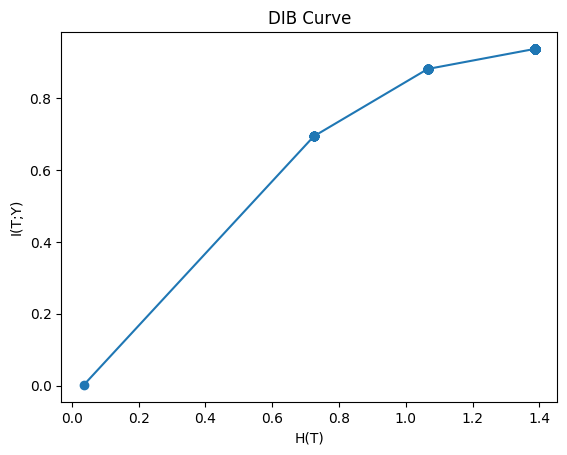

In [6]:
beta_values = np.linspace(0, 20, 201)
DIB_curve(data_joint_pix, beta_values, max_iter=100)


<h2> Test the algorithm on gaussian points </h2>

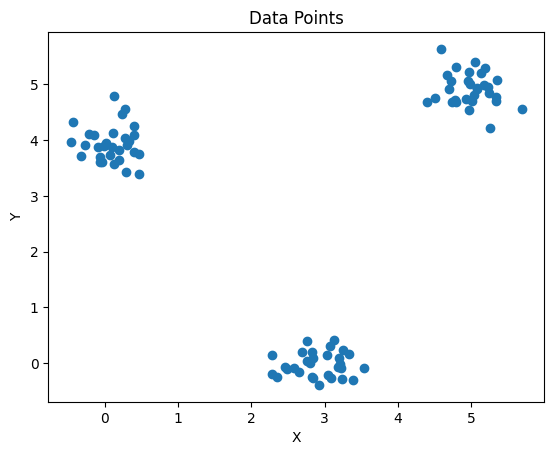

In [4]:
num_points_per_distribution = 30
mean_list = [[3, 0], [0, 4], [5, 5]]
cov_list = [[[.1, 0], [0, .1]], [[.1, 0], [0, .1]], [[.1, 0], [0, .1]]]

# Generate Gaussian points
points_gaussian = generate_gaussian_points(num_points_per_distribution, mean_list, cov_list)

# Plot the points
plt.scatter(points_gaussian[:, 0], points_gaussian[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.show()


In [5]:
data_with_index = add_index_to_data(points_gaussian)
p_x_given_i, p_ix = calculate_probabilities(data_with_index)

In [6]:
# Run the iterative algorithm
q_t_given_x, q_t, q_y_given_t = geom_DIB(p_ix, max_iter=100, beta = 10)

Iteration: 0 out of 100
Iteration: 1 out of 100
Iteration: 2 out of 100
Iteration: 3 out of 100
Iteration: 4 out of 100
Iteration: 5 out of 100
Iteration: 6 out of 100
Iteration: 7 out of 100
Iteration: 8 out of 100
Iteration: 9 out of 100
Iteration: 10 out of 100
Iteration: 11 out of 100
Iteration: 12 out of 100
Iteration: 13 out of 100
Iteration: 14 out of 100
Iteration: 15 out of 100
Iteration: 16 out of 100
Iteration: 17 out of 100
Iteration: 18 out of 100
Iteration: 19 out of 100
Iteration: 20 out of 100
Iteration: 21 out of 100
Iteration: 22 out of 100
Iteration: 23 out of 100
Iteration: 24 out of 100
Iteration: 25 out of 100
Iteration: 26 out of 100
Iteration: 27 out of 100
Iteration: 28 out of 100
Iteration: 29 out of 100
Iteration: 30 out of 100
Iteration: 31 out of 100
Iteration: 32 out of 100
Iteration: 33 out of 100
Iteration: 34 out of 100
Iteration: 35 out of 100
Iteration: 36 out of 100
Iteration: 37 out of 100
Iteration: 38 out of 100
Iteration: 39 out of 100
Iteration:

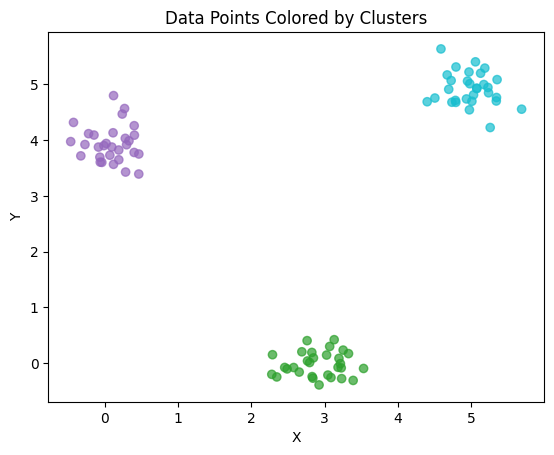

In [7]:
plot_clusters(points_gaussian, q_t_given_x)

In [11]:
q_t_given_x_v1, q_t_v1, q_y_given_t_v1 = geom_DIB(p_ix, max_iter=50, beta = 90)
I_TY_v1 = mutual_information(q_t_v1.reshape(-1, 1) * q_y_given_t_v1)
H_T_v1 = entropy(q_t_v1)

print(H_T_v1, I_TY_v1)

1.5079601107344376 1.1014658289970871


In [11]:
np.linspace(4, 500, 9)

array([  4.,  66., 128., 190., 252., 314., 376., 438., 500.])

Beta: 1 out of 20
Iteration: 0 out of 50
Iteration: 1 out of 50
Iteration: 2 out of 50
Iteration: 3 out of 50
Iteration: 4 out of 50
Iteration: 5 out of 50
Iteration: 6 out of 50
Iteration: 7 out of 50
Iteration: 8 out of 50
Iteration: 9 out of 50
Iteration: 10 out of 50
Iteration: 11 out of 50
Iteration: 12 out of 50
Iteration: 13 out of 50
Iteration: 14 out of 50
Iteration: 15 out of 50
Iteration: 16 out of 50
Iteration: 17 out of 50
Iteration: 18 out of 50
Iteration: 19 out of 50
Iteration: 20 out of 50
Iteration: 21 out of 50
Iteration: 22 out of 50
Iteration: 23 out of 50
Iteration: 24 out of 50
Iteration: 25 out of 50
Iteration: 26 out of 50
Iteration: 27 out of 50
Iteration: 28 out of 50
Iteration: 29 out of 50
Iteration: 30 out of 50
Iteration: 31 out of 50
Iteration: 32 out of 50
Iteration: 33 out of 50
Iteration: 34 out of 50
Iteration: 35 out of 50
Iteration: 36 out of 50
Iteration: 37 out of 50
Iteration: 38 out of 50
Iteration: 39 out of 50
Iteration: 40 out of 50
Iteratio

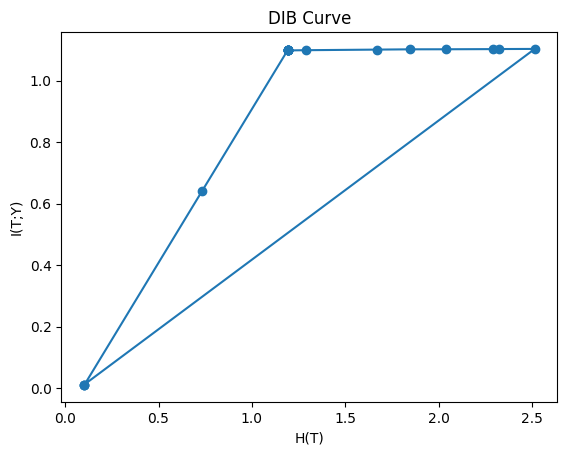

In [12]:
x= np.linspace(4, 500, 9)
y = np.linspace(0, 1, 11)
beta_values = np.append(y, x)
DIB_curve(p_ix, beta_values, max_iter=50)

In [13]:
# Define a range of beta values
betas = np.linspace(0, 500, 101)

# Initialize an empty list to store the number of clusters
num_clusters_list = []

# Iterate over each beta value
for beta in betas:
    # Run iterative_algorithm to obtain q_t_given_x
    q_t_given_x, _, _ = geom_DIB(p_ix, max_iter=100, beta=beta)
    
    # Calculate the number of clusters
    column_sum = np.sum(q_t_given_x, axis=0)
    num_clusters = np.count_nonzero(column_sum)
    
    # Append the number of clusters to the list
    num_clusters_list.append(num_clusters)

# Plot the number of clusters against beta values
plt.plot(betas, num_clusters_list)
plt.xlabel('Beta')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Beta')
plt.grid(True)
plt.show()

Iteration: 0 out of 100
Iteration: 1 out of 100
Iteration: 2 out of 100
Iteration: 3 out of 100
Iteration: 4 out of 100
Iteration: 5 out of 100
Iteration: 6 out of 100
Iteration: 7 out of 100
Iteration: 8 out of 100
Iteration: 9 out of 100
Iteration: 10 out of 100
Iteration: 11 out of 100
Iteration: 12 out of 100
Iteration: 13 out of 100
Iteration: 14 out of 100
Iteration: 15 out of 100
Iteration: 16 out of 100
Iteration: 17 out of 100
Iteration: 18 out of 100
Iteration: 19 out of 100
Iteration: 20 out of 100
Iteration: 21 out of 100
Iteration: 22 out of 100
Iteration: 23 out of 100
Iteration: 24 out of 100
Iteration: 25 out of 100
Iteration: 26 out of 100
Iteration: 27 out of 100
Iteration: 28 out of 100
Iteration: 29 out of 100
Iteration: 30 out of 100
Iteration: 31 out of 100
Iteration: 32 out of 100
Iteration: 33 out of 100
Iteration: 34 out of 100
Iteration: 35 out of 100
Iteration: 36 out of 100
Iteration: 37 out of 100
Iteration: 38 out of 100
Iteration: 39 out of 100
Iteration:

<h2> Test on another Gaussian dataset where clusters are less obvious. </h2>

In [16]:
# Set parameters
num_points_per_distribution = 10
mean_list = [[3, 0], [0, 4], [4, 4]]
cov_list = [[[0.6, 0], [0, 0.6]], [[0.6, 0], [0, 0.6]], [[0.6, 0], [0, 0.6]]]

# Generate Gaussian points
gaussian_points_v2 = generate_gaussian_points(num_points_per_distribution, mean_list, cov_list)

# Add index to the data
data_with_index_v2 = add_index_to_data(gaussian_points_v2)

# Calculate distributions
p_x_given_i_v2, p_ix_v2 = calculate_probabilities(data_with_index_v2)


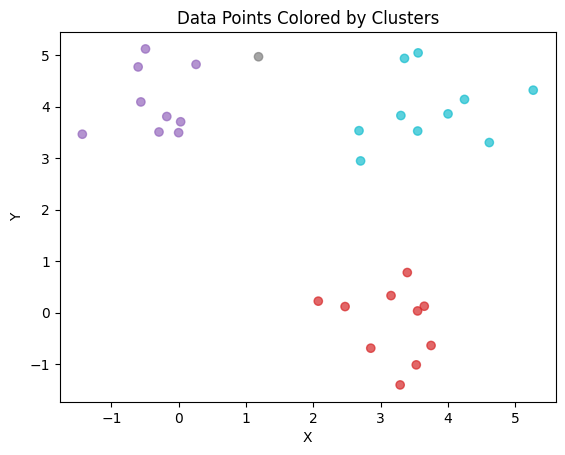

In [17]:
# Apply geometric information bottleneck algorithm
q_t_given_x_v2, q_t_v2, q_y_given_t_v2 = geom_DIB(p_ix_v2, max_iter=100, beta = 3)

# Plot the clusters
plot_clusters(gaussian_points_v2, q_t_given_x_v2)


---
---
---
---
---

In [64]:
def DIB_curve_2(p_xy, beta_values, max_iter=100):
    """
    Plot the DIB curve.

    Parameters:
    - p_xy (numpy.ndarray): Joint probability distribution of random variables X and Y.
    - beta_values (list): List of beta values to be used in the iterative algorithm.
    - max_iter (int, default=100): Maximum number of iterations for the iterative algorithm.

    Returns:
    - The DIB curve plot.
    """
    # Initialize lists to store I(T;Y) and H(T) for each beta
    mutual_information_values = []
    entropy_values = []

    beta_n = 0
    for beta in beta_values:
        # Print iteration number
        beta_n += 1
        print("Beta:", beta_n, "out of", len(beta_values))
        
        # Run the iterative algorithm
        q_t_given_x, q_t, q_y_given_t = geom_DIB(p_xy, max_iter=max_iter, beta=beta)

        # Calculate the mutual information I(T;Y)
        I_ty = mutual_information(q_t.reshape(-1, 1) * q_y_given_t)

        # Calculate the entropy H(T)
        H_t = entropy(q_t)

        # Append the mutual information and entropy to the lists
        mutual_information_values.append(I_ty)
        entropy_values.append(H_t)

    # Plot the DIB curve
    plt.figure(figsize=(12, 8))  # Adjust size to make space for annotations
    for i, beta in enumerate(beta_values):
        plt.plot(entropy_values[i], mutual_information_values[i], marker='o', linestyle='-')  # plot points
        plt.annotate(f'β={beta:.1f}',  # text to display
                     (entropy_values[i], mutual_information_values[i]),  # point to annotate
                     textcoords="offset points",  # how to position the text
                     xytext=(0,-15),  # distance from text to points (x,y)
                     fontsize=12,  # set text fontsize
                     ha='center')  # horizontal alignment can be left, right or center
    
    # Connect points with dashed lines
    for i in range(len(beta_values) - 1):
        plt.plot([entropy_values[i], entropy_values[i + 1]], [mutual_information_values[i], mutual_information_values[i + 1]], linestyle='--', color='gray')


    plt.xlabel('H(T)', fontsize=14)  # Increase axis title fontsize
    plt.ylabel('I(T;Y)', fontsize=14)  # Increase axis title fontsize
    plt.title('DIB Curve', fontsize=16)
    plt.grid(True)
    plt.show()


Beta: 1 out of 8
Iteration: 0 out of 50
Iteration: 1 out of 50
Iteration: 2 out of 50
Iteration: 3 out of 50
Iteration: 4 out of 50
Iteration: 5 out of 50
Iteration: 6 out of 50
Iteration: 7 out of 50
Iteration: 8 out of 50
Iteration: 9 out of 50
Iteration: 10 out of 50
Iteration: 11 out of 50
Iteration: 12 out of 50
Iteration: 13 out of 50
Iteration: 14 out of 50
Iteration: 15 out of 50
Iteration: 16 out of 50
Iteration: 17 out of 50
Iteration: 18 out of 50
Iteration: 19 out of 50
Iteration: 20 out of 50
Iteration: 21 out of 50
Iteration: 22 out of 50
Iteration: 23 out of 50
Iteration: 24 out of 50
Iteration: 25 out of 50
Iteration: 26 out of 50
Iteration: 27 out of 50
Iteration: 28 out of 50
Iteration: 29 out of 50
Iteration: 30 out of 50
Iteration: 31 out of 50
Iteration: 32 out of 50
Iteration: 33 out of 50
Iteration: 34 out of 50
Iteration: 35 out of 50
Iteration: 36 out of 50
Iteration: 37 out of 50
Iteration: 38 out of 50
Iteration: 39 out of 50
Iteration: 40 out of 50
Iteration

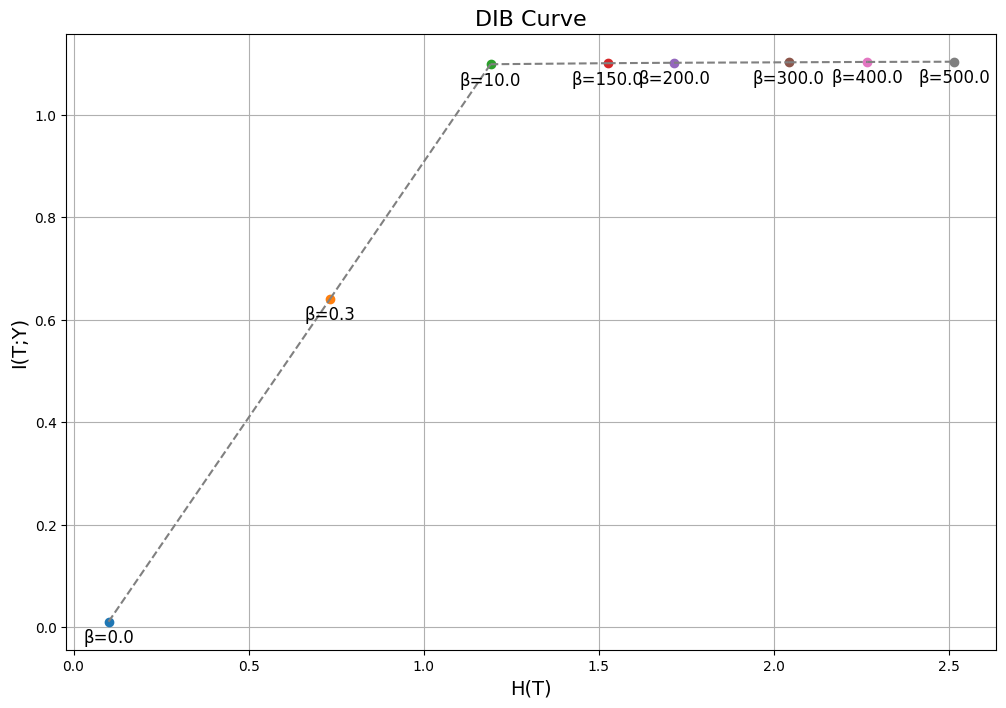

In [65]:
y = [0, 0.3, 10, 150, 200, 300, 400, 500]
DIB_curve_2(p_ix, y, max_iter=50)